<a href="https://colab.research.google.com/github/JulianaFanni/mvp-MachineLearning-Analytics/blob/main/Juliana_Fanni_MVP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP- Juliana Fanni

Disciplina: Sprint: Machine Learning & Analytics

Profs. Hugo Villamizar e Patrick Happ

Aluna: Juliana Cardozo Pereira Fanni

## 1. Definição do Problema

https://huggingface.co/datasets/marmal88/skin_cancer

A instituição é uma organização que tem como objetivo projetos de pesquisas científicas na área de saúde. Uma vez comprovadas a segurança e a eficácia do produto na fase pré-clínica, iniciam-se as pesquisas em seres humanos.

As pessoas se voluntariam para participar de ensaios clínicos para testar as intervenções médicas, incluindo drogas, células e outros produtos, chamados de pesquisados. No entanto , após uma análise dos pesquisados nas pesquisas identificou um alto número de **Falha de Triagem**  no status dos pesquisados, ou seja, um voluntário que não se enquadrou adequadamente ao projeto de pesquisa causando grande impacto finaceiro e prazo.


Diante do acima exposto, o objetivo deste trabalho é prever se um voluntário à um projeto de pesquisa se enquadra ao perfil de estudo do projeto de pesquisa. Para este MVP, focarei nos criterios de enquadramento dos projetos de pesquisa de Ancogenetica. **negrito**

O dataset usado neste projeto será o próprio da instituição e conjunto de dados foi extraído para uma planilha excel a partir de um sistema interno e de acesso restrito, no entanto todos os dados dos pesquisados e o nome das pesquisas foram alterados tendo assim os direitos garantidos pela lgpd e dos próprios projetos de pesquisa da empresa.

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn.metrics as skm
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from IPython.display import Image, display
from datetime import datetime
from sklearn.metrics import confusion_matrix, classification_report
import itertools
import numpy as np
import sklearn.metrics as skm
import matplotlib.pyplot as plt

In [2]:
! pip install transformers[torch] datasets evaluate scikit-learn matplotlib


In [3]:
from datasets import load_dataset

dataset = load_dataset("marmal88/skin_cancer")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [4]:
#Conhecendo o Dataset
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'image_id', 'lesion_id', 'dx', 'dx_type', 'age', 'sex', 'localization'],
        num_rows: 9577
    })
    validation: Dataset({
        features: ['image', 'image_id', 'lesion_id', 'dx', 'dx_type', 'age', 'sex', 'localization'],
        num_rows: 2492
    })
    test: Dataset({
        features: ['image', 'image_id', 'lesion_id', 'dx', 'dx_type', 'age', 'sex', 'localization'],
        num_rows: 1285
    })
})

Como o dataset não veio separado com as bases train e test, por mais que são poucos dados, resolvido divido-los. Separei 4000 linhas para o treinamento e 500 linhas para a base de teste, que irei usar para avaliar o meu modelo .

In [5]:
train_dataset = len(dataset['train'])
val_dataset = len(dataset['validation'])
test_dataset = len(dataset['test'])

tam_train_dataset = len(dataset['train'])
tam_val_dataset = len(dataset['validation'])
tam_test_dataset = len(dataset['test'])

print(f"Temos um total de {tam_train_dataset} para o treinamento do modelo de deep learning")
print(f"Temos um total de {tam_val_dataset} para avaliação do modelo de deep learning")
print(f"Temos um total de {tam_test_dataset} para o teste do modelo de deep learning")

Temos um total de 9577 para o treinamento do modelo de deep learning
Temos um total de 2492 para avaliação do modelo de deep learning
Temos um total de 1285 para o teste do modelo de deep learning


In [6]:
print(f"Informações dos 10 primeiros de treinamento: \n {dataset['train'][:1]}")

print(f"Informações dos 10 primeiros de avaliação: \n {dataset['validation'][:1]}")

print(f"Informações dos 10 primeiros de avaliação: \n {dataset['test'][:1]}")


Informações dos 10 primeiros de treinamento: 
 {'image': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x791DEF950EB0>], 'image_id': ['ISIC_0024329'], 'lesion_id': ['HAM_0002954'], 'dx': ['actinic_keratoses'], 'dx_type': ['histo'], 'age': [75.0], 'sex': ['female'], 'localization': ['lower extremity']}
Informações dos 10 primeiros de avaliação: 
 {'image': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x791DEF950F40>], 'image_id': ['ISIC_0024450'], 'lesion_id': ['HAM_0005505'], 'dx': ['actinic_keratoses'], 'dx_type': ['histo'], 'age': [50.0], 'sex': ['male'], 'localization': ['upper extremity']}
Informações dos 10 primeiros de avaliação: 
 {'image': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x791DEF950E20>], 'image_id': ['ISIC_0024329'], 'lesion_id': ['HAM_0002954'], 'dx': ['actinic_keratoses'], 'dx_type': ['histo'], 'age': [75.0], 'sex': ['female'], 'localization': ['lower extremity']}


In [5]:


dataset["train"].features



{'image': Image(decode=True, id=None),
 'image_id': Value(dtype='string', id=None),
 'lesion_id': Value(dtype='string', id=None),
 'dx': Value(dtype='string', id=None),
 'dx_type': Value(dtype='string', id=None),
 'age': Value(dtype='float64', id=None),
 'sex': Value(dtype='string', id=None),
 'localization': Value(dtype='string', id=None)}

In [7]:
# Convertendo para um DataFrame pandas o dataset de Treinamento
df_train = pd.DataFrame(dataset['train'], columns=dataset['train'].features)
df_train.head()

,image,image_id,lesion_id,dx,dx_type,age,sex,localization
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,ISIC_0024329,HAM_0002954,actinic_keratoses,histo,75.0,female,lower extremity
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,ISIC_0024372,HAM_0005389,actinic_keratoses,histo,70.0,male,lower extremity
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,ISIC_0024418,HAM_0003380,actinic_keratoses,histo,75.0,female,lower extremity
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,ISIC_0024450,HAM_0005505,actinic_keratoses,histo,50.0,male,upper extremity
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,ISIC_0024463,HAM_0004568,actinic_keratoses,histo,50.0,male,upper extremity


In [8]:
# Convertendo para um DataFrame pandas o dataset de Treinamento
df_teste = pd.DataFrame(dataset['test'], columns=dataset['test'].features)
df_teste.head()

,image,image_id,lesion_id,dx,dx_type,age,sex,localization
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,ISIC_0024329,HAM_0002954,actinic_keratoses,histo,75.0,female,lower extremity
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,ISIC_0024654,HAM_0005705,actinic_keratoses,histo,75.0,female,lower extremity
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,ISIC_0024707,HAM_0005448,actinic_keratoses,histo,60.0,male,face
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,ISIC_0024763,HAM_0006524,actinic_keratoses,histo,65.0,male,ear
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,ISIC_0025539,HAM_0000967,actinic_keratoses,histo,75.0,male,lower extremity


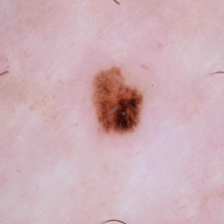

In [ ]:
img_train = dataset["train"][2]
img_train['image'].resize((img_height, img_width))

In [ ]:
#Exemplo de algumas imagens

batch_size = 32
img_height = 224
img_width = 224
num_classes = 544

count_images = 0
examples =10
for img_cont in dataset['train'][:2]:
   img_train = dataset["train"][1]
   img_train['image'].resize((img_height, img_width))
   count_images+=1




In [ ]:
img_train = dataset["train"]['image'][:2]



In [ ]:
# Função que cria a variável "class" com valores categóricos

def calcula_classe_cancer(cancer):
  vcancer = cancer

  if cancer == 0:
    return "Cancer Negativo"
  elif cancer == 1:
    return "Cancer Positivo"



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta função imprime e plota a matriz de confusão.
    A normalização pode ser aplicada definindo `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusão normalizada")
    else:
        print('Matriz de confusão sem normalização')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Label real')
    plt.xlabel('Label predito')




In [ ]:
df = (dataset['train'].info.splits , ',')

df

({'train': SplitInfo(name='train', num_bytes=2650315342, num_examples=9577, shard_lengths=[1916, 1916, 1915, 1915, 1915], dataset_name='skin_cancer'),
  'validation': SplitInfo(name='validation', num_bytes=689697213, num_examples=2492, shard_lengths=[2246, 246], dataset_name='skin_cancer'),
  'test': SplitInfo(name='test', num_bytes=354643355, num_examples=1285, shard_lengths=None, dataset_name='skin_cancer')},
 ',')

In [ ]:
# Calculando as métricas


NameError: name 'y_true' is not defined

## 2. Carga de Dados